## Import MNIST data 

In [1]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("done importing")


done importing


In [2]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


## Show some training images & labels

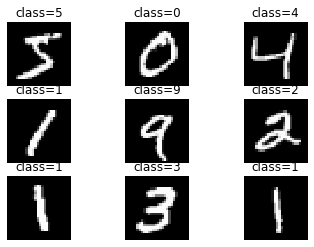

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='nearest')
    plt.title("class={}".format(y_train[i]))
    plt.axis('off')


## Reshape and normalize the input data

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


## Make labels one-hot 

In [5]:
print(y_train[1])
print(y_train[2])

0
4


In [6]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
print(Y_train[1])
print(Y_train[2])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Build network

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) 
model.add(Dropout(0.2))   

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))   

model.add(Dense(10))
model.add(Activation('softmax')) 

## Compile + specify loss and optimizer

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## Train model

In [10]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 7s 10ms/step - loss: 1.6703 - accuracy: 0.5260 - val_loss: 0.5357 - val_accuracy: 0.8691
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.5705 - accuracy: 0.8409 - val_loss: 0.3765 - val_accuracy: 0.8957
Epoch 3/10
469/469 [==============================] - 4s 10ms/step - loss: 0.4439 - accuracy: 0.8696 - val_loss: 0.3228 - val_accuracy: 0.9092
Epoch 4/10
469/469 [==============================] - 4s 10ms/step - loss: 0.3875 - accuracy: 0.8874 - val_loss: 0.2925 - val_accuracy: 0.9163
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3463 - accuracy: 0.9007 - val_loss: 0.2733 - val_accuracy: 0.9228
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3227 - accuracy: 0.9085 - val_loss: 0.2543 - val_accuracy: 0.9281
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3006 - accuracy: 0.9125 - val_loss: 0.2411 - val_accuracy: 0.9321


## Evaluate model

In [11]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.2089 - accuracy: 0.9399
Test score: 0.20889003574848175
Test accuracy: 0.9398999810218811


## Find correct predictions and mistakes

In [13]:
predicted_classes = model.predict_classes(X_test)

import numpy as np

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

## Inspect some correct predictions

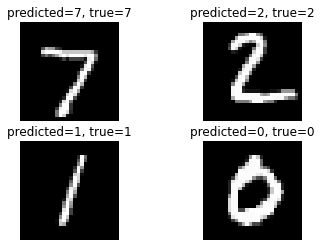

In [14]:
for i, correct in enumerate(correct_indices[:4]):
    plt.subplot(2,2,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("predicted={}, true={}".format(predicted_classes[correct], y_test[correct]))
    plt.axis("off")


## Inspect wrong predictions

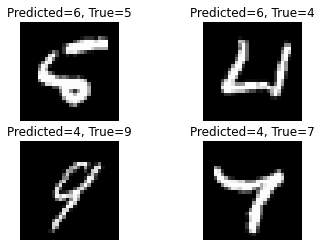

In [15]:
for i, incorrect in enumerate(incorrect_indices[:4]):
    plt.subplot(2,2,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted={}, True={}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.axis("off")

In [ ]:
import keras

keras.backend.clear_session()